In [1]:
import numpy as np
import pandas as pd
import sklearn
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Chemical_properties1515.csv contains the numerical values for chemical features
- todo: FIX NAMING

In [4]:
dfCore = pd.read_csv('https://raw.githubusercontent.com/meidelien/Metabolic-network-layout-using-biochemical-coordinates/main/data/Chemical_descriptors.csv', usecols=[2,5,6] + list(range(10,218)), index_col=0)
# df1515 = pd.read_csv("Chemical_properties1515.csv")
# df1515 = pd.read_csv("https://raw.githubusercontent.com/meidelien/Metabolic-network-layout-using-biochemical-coordinates/main/data/Chemical_descriptors1515.csv", usecols=[2,5,6] + list(range (10,218)), index_col=0)

# df1515 = pd.read_csv("1515_for_PCA.csv", index_col=0)

df1515 = pd.read_csv("1515_PCA.csv", index_col=0)



In [5]:
import numpy as np

# df1515.replace(np.nan, 0) # fml

df1515["BCUT2D_MWHI"] = df1515["BCUT2D_MWHI"].replace(np.nan, 0)

df1515["BCUT2D_MWLOW"] = df1515["BCUT2D_MWLOW"].replace(np.nan, 0)

df1515["BCUT2D_CHGHI"] = df1515["BCUT2D_CHGHI"].replace(np.nan, 0)

df1515["BCUT2D_LOGPHI"] = df1515["BCUT2D_LOGPHI"].replace(np.nan, 0)

df1515["BCUT2D_LOGPLOW"] = df1515["BCUT2D_LOGPLOW"].replace(np.nan, 0)

df1515["BCUT2D_CHGLO"] = df1515["BCUT2D_CHGLO"].replace(np.nan, 0)

df1515["BCUT2D_MRHI"] = df1515["BCUT2D_MRHI"].replace(np.nan, 0)

df1515["BCUT2D_MRLOW"] = df1515["BCUT2D_MRLOW"].replace(np.nan, 0)

df1515["MaxPartialCharge"] = df1515["MaxPartialCharge"].replace(np.nan, 0)

df1515["MinPartialCharge"] = df1515["MinPartialCharge"].replace(np.nan, 0)

df1515["MaxAbsPartialCharge"] = df1515["MaxAbsPartialCharge"].replace(np.nan, 0)

df1515["MinAbsPartialCharge"] = df1515["MinAbsPartialCharge"].replace(np.nan, 0)

In [ ]:
dfCore.tail()
df1515.tail()

BiGG_list = df1515.pop("BiGG")


### Popping out non-numericals before scaling/normalization

In [12]:
BiGG_list = df1515.pop("BiGG")
MNXM_list = df1515.pop("MNXM")

## Scaling

In [13]:
# df2 = pd.read_csv("chemical_properties.csv")
# xx = df.loc[:, df2.columns].values

xx = df1515.loc[:,df1515.columns].values

In [14]:
xx = StandardScaler().fit_transform(xx)

In [15]:
xx.shape

(963, 57)

In [16]:
np.mean(xx)

-1.1261813049703725e-17

In [17]:
np.mean(xx), np.std(xx)

(-1.1261813049703725e-17, 1.0)

In [18]:
feat_cols = ["feature" +str(i) for i in range(xx.shape[1])]

In [19]:
normalized_descriptors = pd.DataFrame(xx, columns = feat_cols)

In [ ]:
# normalized_descriptors.tail()

In [ ]:
# normalized_descriptors.head()

In [36]:
# 2 components 
# pca_descriptors = PCA(n_components= 2)

# 4 components
# pca_descriptors = PCA(n_components= 4)

# 5 components
pca_descriptors = PCA(n_components= 5)

principalComponents_descriptors = pca_descriptors.fit_transform(normalized_descriptors)

In [37]:
pca_descriptors

PCA(n_components=5)

In [38]:
# 2 Components
# principal_descriptors_df = pd.DataFrame(data= principalComponents_descriptors, columns= ["PC1", "PC2"])

# 4 components
principal_descriptors_df = pd.DataFrame(data= principalComponents_descriptors, columns= ["PC1", "PC2", "PC3", "PC4", "PC5"])

(-5.0, 5.0)

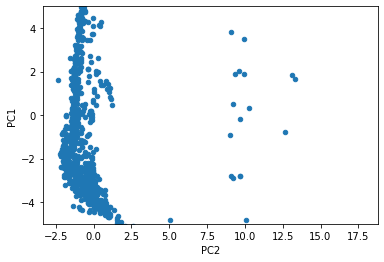

In [23]:
#principal_descriptors_df.tail()
ax  = principal_descriptors_df.plot.scatter(x = "PC2", y ="PC1")
ax.set_ylim(-5, 5)

In [39]:
print("Explained variation per principal component: {}".format(pca_descriptors.explained_variance_))

Explained variation per principal component: [32.31633743  7.52975426  2.96807414  2.41113118  2.13836789]


In [58]:
# a =  63.53175376 +  12.87115987 # + 10.33669742 + 9.44759513 #34.16290627 +  7.7769594
# a = 34.16290627 + 7.7769594 +  2.92142128 + 2.40747469
# a

47.26876164

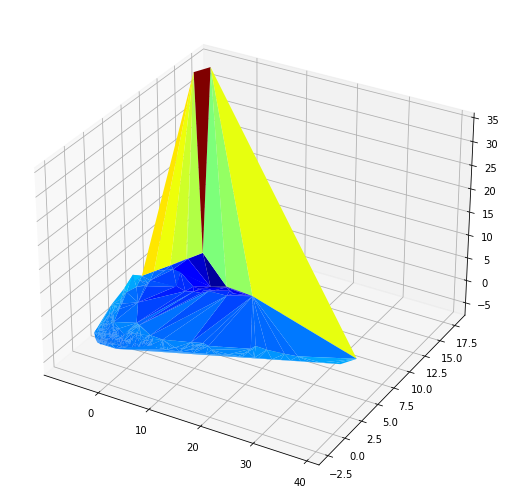

In [35]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
from mpl_toolkits.mplot3d import Axes3D
import plotly
fig = plt.figure(figsize=(14, 9))
ax = plt.axes(projection="3d")

ax.plot_trisurf(principal_descriptors_df.PC1, principal_descriptors_df.PC2, principal_descriptors_df.PC3, cmap=cm.jet, linewidth=0.2,antialiased = True)
plt.show()